In [1]:
from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/grade_distributions.csv')

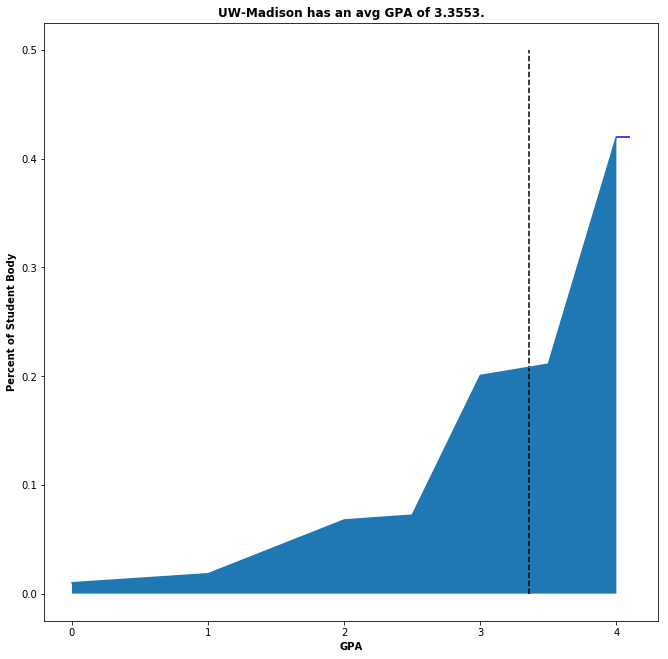

In [3]:
cols = ['a_count', 'ab_count', 'b_count', 'bc_count', 'c_count', 'd_count', 'f_count']
grades = df[cols].iloc[:, ::-1]   
grades = grades[grades.sum(axis=1) != 0].copy()
grades.columns = [4, 3.5, 3, 2.5, 2, 1, 0][::-1]
sums = grades.sum()
pcts = sums / sums.sum()
plt.figure(figsize=(11,11))
sns.lineplot(grades.columns, pcts)
avg_gpa = round(np.average(sums.index, weights=sums), 4)
plt.vlines(avg_gpa, 0, .5, linestyles='dashed')
plt.hlines(pcts.iloc[-1], 4, 4.1, colors='blue')
plt.fill_between(grades.columns, pcts)
plt.xlabel("GPA", weight='bold')
plt.ylabel("Percent of Student Body", weight='bold')
plt.title(f'UW-Madison has an avg GPA of {avg_gpa}.', weight='bold')
plt.show()

In [11]:
n = 2000
sample_grades = grades.sample(n)

In [10]:
def avg_gpa(df):
    sums = df.sum()
    final = round(np.average(sums.index, weights=sums), 4)
    return final
avg_gpa(sample_grades)

3.3581

In [12]:
# sums = sample_grades.sum()
# round(np.average(sums.index, weights=sums), 4)

3.319

In [13]:
# n = 2000
# sample_grades = grades.sample(n)
# sample_avg_gpa = avg_gpa(sample_grades)
# sample_avg_gpa

In [14]:
bootstrap_samples = []
bootstrap_sample_means = np.zeros(n)
bootstrap_sample_95pcts = np.zeros(n)
for i in range(n):
    bootstrap_sample = sample_grades.sample(n, replace=True)
    bootstrap_samples.append(bootstrap_sample)
    bootstrap_sample_means[i] = avg_gpa(bootstrap_sample)
bootstrap_sample_means
#     bootstrap_sample_95pct = np.percentile(a=bootstrap_sample, q=95)
#     bootstrap_sample_95pcts[i] = bootstrap_sample_95pct

array([3.3124, 3.2775, 3.3293, ..., 3.3354, 3.3195, 3.3164])

In [15]:
bootstrap_sample_means.mean()

3.3190279499999997

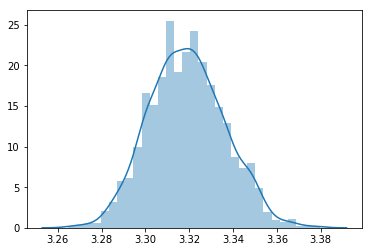

In [16]:
sns.distplot(bootstrap_sample_means);

In [17]:
def conf_interval(query_list, alpha=.05, verbose=False):
    """Pass in a [bootstrapped_list], alpha_lvl, toggle_for_print and return an emperically derived confidence interval"""
    lower = round(np.percentile(a=query_list, q=100*alpha/2), 4)
    upper = round(np.percentile(a=query_list, q=100*(1-alpha/2)), 4)
    if verbose == True:
        print(f'During repeated trials, we would expect {100*(1-alpha)}% of those repeats to have a test statistic between {lower} and {upper}.')
        print(f'The middle of this interval is {(lower + upper) / 2}')
    return lower, upper, alpha

In [18]:
lower, upper, alpha = conf_interval(bootstrap_sample_means, .01, verbose=True)

During repeated trials, we would expect 99.0% of those repeats to have a test statistic between 3.2782 and 3.3658.
The middle of this interval is 3.322
